## Author : Ben madani Yazid

<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET OF DATA SCIENCE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Bank Customer Churn
</h2>
</div>

## Table Of Content


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Importation of librairies</h3>
</div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# data manip
import pandas as pd
import numpy as np
# viz
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('../Data/BCC.csv', sep=',')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing of the Data

* customer_id: Unique identifier for each customer.
* credit_score: Numerical assessment of creditworthiness.
* Geography: Country of residence or operation.
* gender: Gender of the customer.
* age: Age of the customer.
* tenure: Length of time as a customer.
* balance: Amount of money in the customer's account.
* products_number: Number of financial products/services the customer has.
* credit_card: Binary indicator for whether the customer has a credit card.
* active_member: Binary indicator for active membership status.
* estimated_salary: Estimated salary or income of the customer.
* churn: Binary indicator for customer churn (account closure or service discontinuation).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


* data without nan values
* shape is (10000,11)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> First Insights</h3>
</div>

In [5]:
# first insights about data
print('Total number of clients is:', data['customer_id'].nunique(), 'clients')
print('number of churn clients is :', data.loc[data['churn'] == 1]['churn'].count(), 'clients' )
print('number of non churn clients is :', data.loc[data['churn'] == 0]['churn'].count(), 'clients' )
churn = data.loc[data['churn'] == 1]['churn'].count()
nonchurn = data.loc[data['churn'] == 0]['churn'].count()
print('the percentige of churn clients is:', (churn * 100) / len(data.churn), '%')
print('the percentige of non-churn clients is:', (nonchurn * 100) / len(data.churn), '%')
print('Total number of products is:', data['products_number'].nunique(), 'products')
print('number of clients have cards is :', data.loc[data['credit_card'] == 1]['credit_card'].count(), 'cards' )
print('number of clients have cards is :', data.loc[data['credit_card'] == 0]['credit_card'].count(), 'cards' )
withcc = data.loc[data['credit_card'] == 1]['credit_card'].count()
withoutcc = data.loc[data['credit_card'] == 0]['credit_card'].count()
print('the percentige of clients  have credit card is:', (withcc * 100) / len(data.credit_card), '%')
print('the percentige of clients not have credit card is:', (withoutcc * 100) / len(data.credit_card), '%')

print('number of active_member is :', data.loc[data['active_member'] == 1]['active_member'].count(), 'active_members' )
print('number of inctive_member is :', data.loc[data['active_member'] == 0]['active_member'].count(), 'active_members' )
print('our clients from:', data['country'].unique())
print('the sex of our clients is :', data.loc[data['gender'] == 'Male']['gender'].count(), 'Male' )
print('the sex of our clients is :', data.loc[data['gender'] == 'Female']['gender'].count(), 'Female' )
male = data.loc[data['gender'] == 'Male']['gender'].count()
female =  data.loc[data['gender'] == 'Female']['gender'].count()
print('the percentige of male clients is:', (male * 100) / len(data.gender), '%')
print('the percentige of female clients is:', (female * 100) / len(data.gender), '%')

Total number of clients is: 10000 clients
number of churn clients is : 2037 clients
number of non churn clients is : 7963 clients
the percentige of churn clients is: 20.37 %
the percentige of non-churn clients is: 79.63 %
Total number of products is: 4 products
number of clients have cards is : 7055 cards
number of clients have cards is : 2945 cards
the percentige of clients  have credit card is: 70.55 %
the percentige of clients not have credit card is: 29.45 %
number of active_member is : 5151 active_members
number of inctive_member is : 4849 active_members
our clients from: ['France' 'Spain' 'Germany']
the sex of our clients is : 5457 Male
the sex of our clients is : 4543 Female
the percentige of male clients is: 54.57 %
the percentige of female clients is: 45.43 %


* we can see that our target variable 'churn' have imbalanced data so it give me an idea to apply SMOTE to resample the data, the goal is to balance data to get mo accuracy for churning clients.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Visualisations to understand th data</h3>
</div>

<Axes: xlabel='active_member', ylabel='count'>

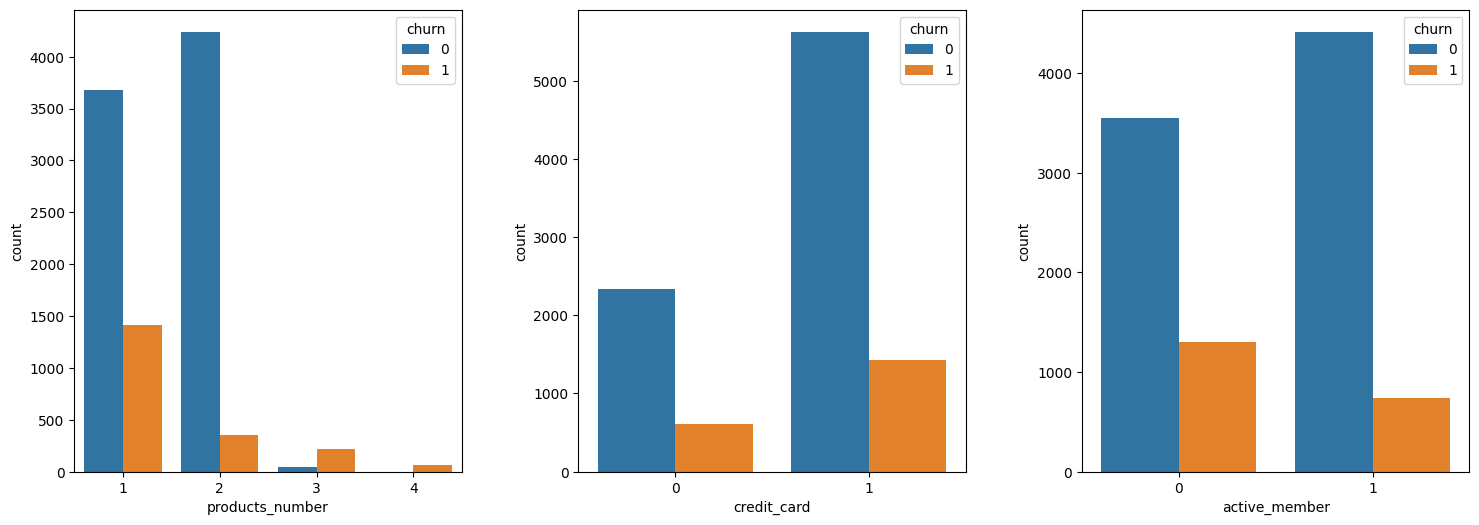

In [6]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "products_number", hue="churn", data = data, ax= ax[0])
sns.countplot(x = "credit_card", hue="churn", data = data, ax = ax[1])
sns.countplot(x = "active_member", hue="churn", data = data, ax = ax[2])

* clients have credit card churn more
* client chose 3,4 product churn more
* inactive members churn more
* number of active_member is : 5151 active_members  
* number of inctive_member is : 4849 active_members
* Some customers might be using the bank's services less frequently but are still maintaining their accounts, leading to a high number of inactive members

<Axes: xlabel='gender', ylabel='count'>

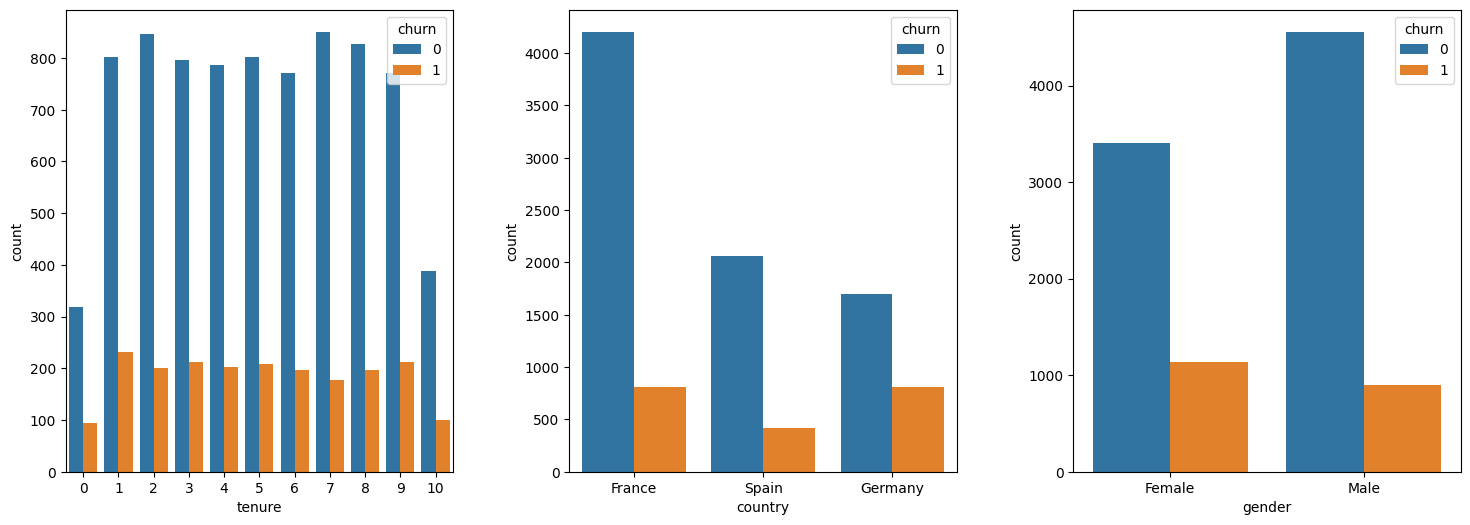

In [7]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "tenure", hue="churn", data = data, ax= ax[0])
sns.countplot(x = "country", hue="churn", data = data, ax = ax[1])
sns.countplot(x = "gender", hue="churn", data = data, ax = ax[2])



* half of clients from france, 25.1 % from germany, 24.8 % from spain
* the percentige of male clients is: 54.57 %
* most tenure between 1-9 its clients churn most
* female churn most
* clients from germany churn most


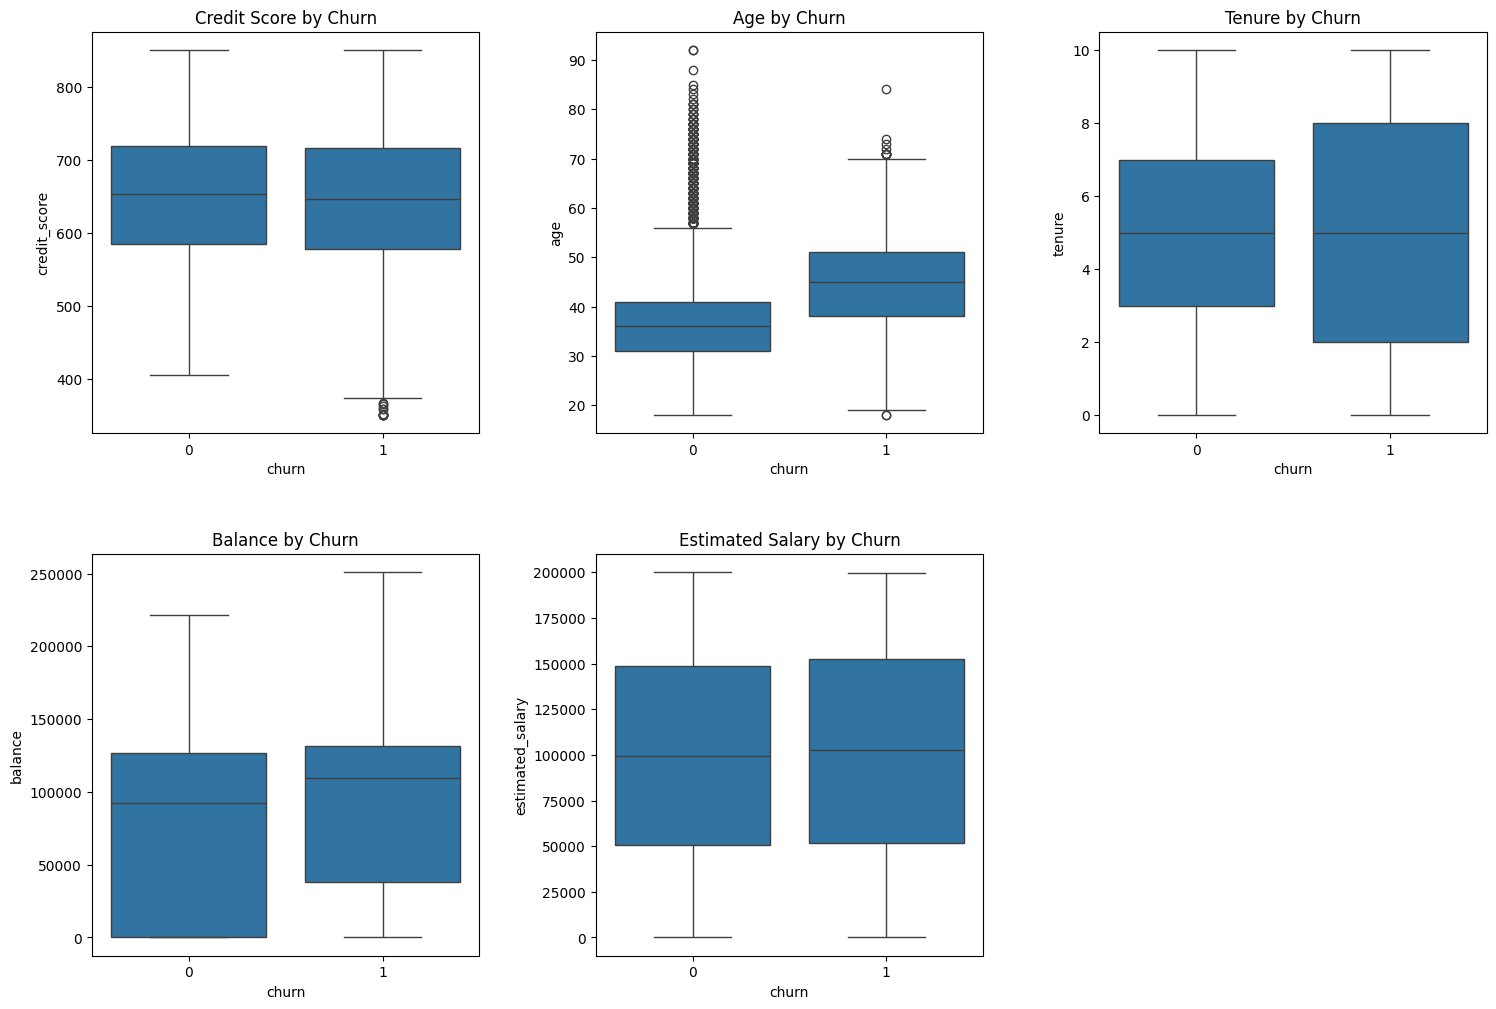

In [8]:
_, ax = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot boxplots for each feature by churn
sns.boxplot(x='churn', y='credit_score', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Credit Score by Churn')

sns.boxplot(x='churn', y='age', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Age by Churn')

sns.boxplot(x='churn', y='tenure', data=data, ax=ax[0, 2])
ax[0, 2].set_title('Tenure by Churn')

sns.boxplot(x='churn', y='balance', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Balance by Churn')

sns.boxplot(x='churn', y='estimated_salary', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Estimated Salary by Churn')

# Hide the unused subplot
ax[1, 2].axis('off')
 
plt.show()

* credit score : churn clients have slightly median, also some clients have < 400
* the median age of churn client is around 45, indicate older clients churn more
* The tenure is roughly the same across all countries (around 5 years) which mean we should propose some strategies to keep clients
* balance : clients with high balance churn more, same for low balance
* salary not a problem for churn

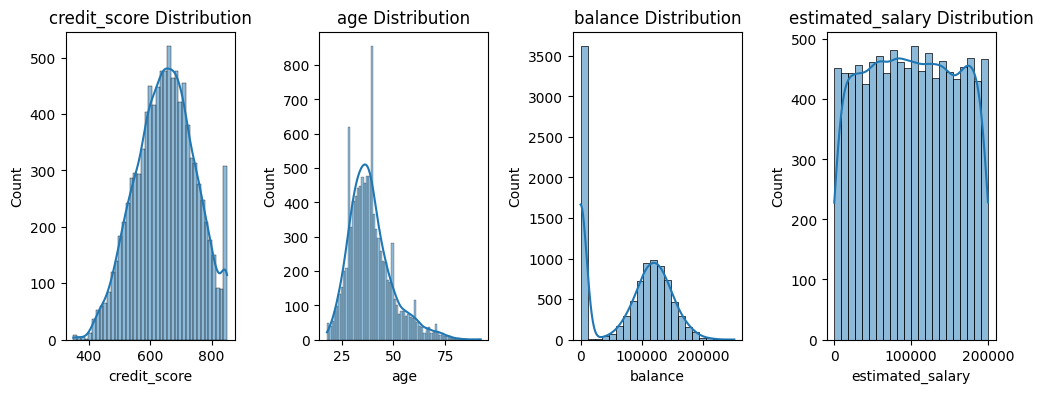

In [9]:
# List of numerical features
numerical_features = ['credit_score', 'age',  'balance', 'estimated_salary']

# Create subplots
fig, axes = plt.subplots(1, len(numerical_features), figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

# Show plot
plt.show()

* Credit Score: The distribution is approximately normal but slightly skewed to the right.
* The age distribution is right-skewed.
* A large number of entries have a balance of zero, indicating many customers might not maintain a balance.

In [10]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Recap before the model


- To handle the outliers i will scale data using StandardScaler, also in business understanding. i will see if i do the same for features like age bins, balance, salary, score.
- i will encode data into binary like gender
- One-Hot Encoding for country feature
- delete customerid because identical Feature does not make any impact
- create heatmap to see the correlation, this will help selecting best features
- split the data then try diffrent models but i will focus on 1 label since we have imbalanced data



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Building the Model

## Selecting the feature and target set


In [11]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.15, random_state=1, stratify=Y)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.15/(1-0.15), random_state=1, stratify=ytrain)

In [13]:
ytrain[:5]


8675    0
4751    1
7948    0
652     0
8198    1
Name: churn, dtype: int64

In [14]:
data.iloc[4749:4755,-1]

4749    0
4750    0
4751    1
4752    0
4753    0
4754    1
Name: churn, dtype: int64

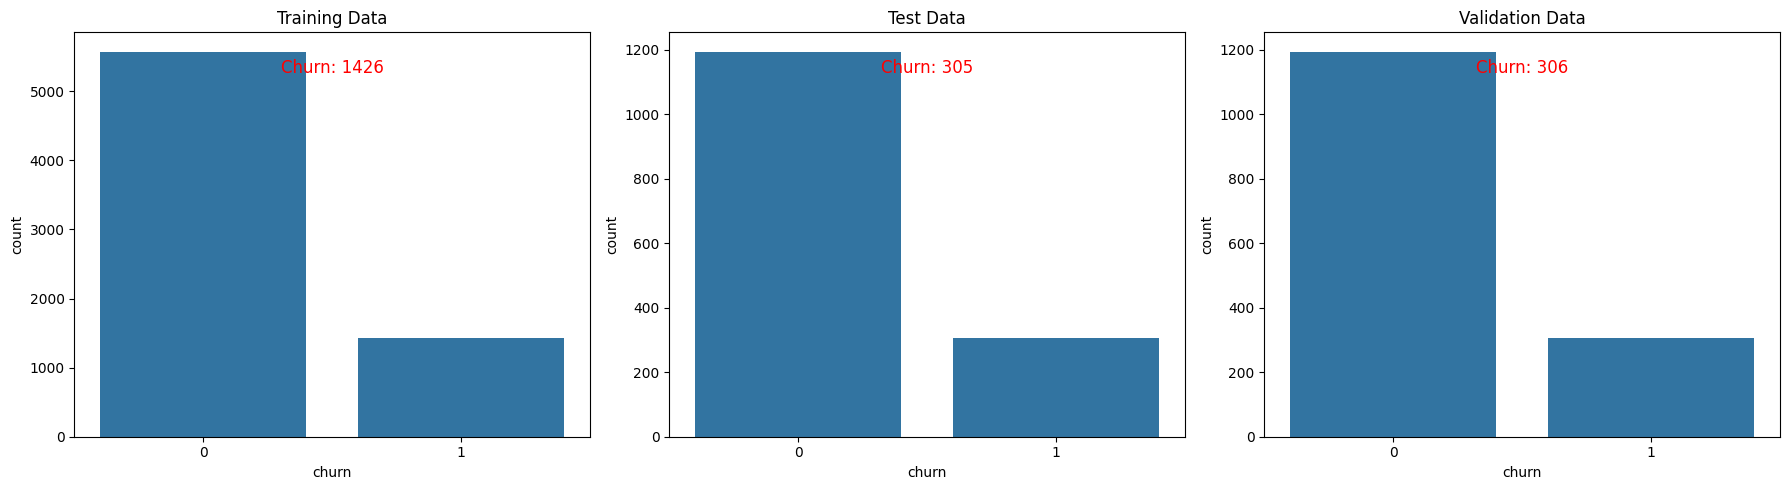

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for y_train
sns.countplot(x=ytrain, ax=axes[0]).set(title='Training Data')
axes[0].annotate(f'Churn: {sum(ytrain == 1)}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

# Plot for y_test
sns.countplot(x=ytest, ax=axes[1]).set(title='Test Data')
axes[1].annotate(f'Churn: {sum(ytest == 1)}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

# Plot for y_val
sns.countplot(x=yval, ax=axes[2]).set(title='Validation Data')
axes[2].annotate(f'Churn: {sum(yval == 1)}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

## Pre-processsing the Data

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_X = X.select_dtypes(include=numerics)
numeric_cols = list(numeric_X.columns)
numeric_cols

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_scl1 = scaler.fit_transform(xtrain[numeric_cols])
xval_scl1 = scaler.transform(xval[numeric_cols])
xtest_scl1 = scaler.transform(xtest[numeric_cols])

In [18]:
features = X.columns
categorical_cols = list(set(features) - set(numeric_cols))
categorical_cols

['gender', 'country']

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

xtrain_scl2 = encoder.fit_transform(xtrain[categorical_cols])
xval_scl2 = encoder.transform(xval[categorical_cols])
xtest_scl2 = encoder.transform(xtest[categorical_cols])

In [20]:
xtrain_scl = np.hstack([xtrain_scl1, xtrain_scl2.todense()])
xval_scl = np.hstack([xval_scl1, xval_scl2.todense()])
xtest_scl = np.hstack([xtest_scl1, xtest_scl2.todense()])

In [21]:
xtrain_scl.shape

(7000, 13)

In [22]:
xtrain_scl

matrix([[ 0.66069015,  1.43768097,  0.68547145, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.11393811,  2.38912148,  1.03032556, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.56784547, -1.3214965 , -0.69394501, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-1.27873217,  1.05710477, -0.00423678, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.51626509, -0.08462384,  1.03032556, ...,  1.        ,
          0.        ,  0.        ],
        [-0.6185033 ,  0.39109642,  0.68547145, ...,  1.        ,
          0.        ,  0.        ]])

In [23]:
df = pd.DataFrame(xtrain_scl, columns=[f'col{i+1}' for i in range(xtrain_scl.shape[1])])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Train the model</h3>
</div>

In [26]:
log_reg = LogisticRegression()
log_reg.fit(np.asarray(xtrain_scl), ytrain)

LogisticRegression()

In [27]:
ypred = log_reg.predict(np.asarray(xval_scl))
ypred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [28]:
log_reg.score(np.asarray(xval_scl), yval)

0.816

In [29]:
cm = confusion_matrix(yval, ypred)
cm

array([[1162,   32],
       [ 244,   62]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
precision_score(yval, ypred)

0.6595744680851063

### Class weight: balanced

In [31]:
log_reg_bal = LogisticRegression(class_weight="balanced")
log_reg_bal.fit(np.asarray(xtrain_scl), ytrain)
ypredbal = log_reg.predict(np.asarray(xval_scl))
ypredbal[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
log_reg_bal.score(np.asarray(xval_scl), yval)

0.7186666666666667

In [33]:
cm = confusion_matrix(yval, ypredbal)
cm

array([[1162,   32],
       [ 244,   62]], dtype=int64)

In [34]:
precision_score(yval, ypredbal)

0.6595744680851063

In [35]:
print(classification_report(y_true=yval, y_pred=ypredbal))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1194
           1       0.66      0.20      0.31       306

    accuracy                           0.82      1500
   macro avg       0.74      0.59      0.60      1500
weighted avg       0.79      0.82      0.77      1500



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Optimisation of the model</h3>
</div>

## Polynomial Features + Logistic Regression Model

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(np.asarray(xtrain_scl))

poly_reg_model = LogisticRegression( class_weight={0:1, 1:1}, C=0.001)
poly_reg_model.fit(x_poly, ytrain)

LogisticRegression(C=0.001, class_weight={0: 1, 1: 1})

In [37]:
ypred_poly = poly_reg_model.predict(poly.transform(np.asarray(xval_scl)))

ypred_poly[ypred_poly==1].sum()

142

In [38]:
yval[yval==1].sum()

306

In [39]:
cm = confusion_matrix(yval, ypred_poly)
cm

array([[1176,   18],
       [ 182,  124]], dtype=int64)

In [40]:
precision_score(yval, ypred_poly)

0.8732394366197183

In [41]:
accuracy_score(yval, ypred_poly)

0.8666666666666667

In [42]:
f1_score(yval, ypred_poly)

0.5535714285714286

In [43]:
ypred_poly[ypred_poly <= 0.5]=0
ypred_poly[ypred_poly > 0.5]=1

In [44]:
print(classification_report(y_true=yval, y_pred=ypred_poly))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1194
           1       0.87      0.41      0.55       306

    accuracy                           0.87      1500
   macro avg       0.87      0.70      0.74      1500
weighted avg       0.87      0.87      0.85      1500



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Conclution